<a href="https://colab.research.google.com/github/Lederback/Lunar-Lander/blob/main/LunarLander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install -q swig
!pip install -q gymnasium[box2d]

  Preparing metadata (setup.py) ... done


In [50]:
import numpy as np
import gymnasium as gym
import tensorflow as tf
from tensorflow import keras

In [53]:
def get_action(model, state, epsilon):
    if np.random.rand() <= epsilon:
        return np.random.randint(4)
    else:
        q_values = model.predict(state)
        return np.argmax(q_values[0])

In [73]:
def build_model(input_shape, output_shape):
    model = keras.Sequential()
    model.add(keras.layers.Dense(24, input_shape=(8,), activation='relu'))


    model.add(keras.layers.Dense(24, activation='relu'))
    model.add(keras.layers.Dense(output_shape, activation='linear'))
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

In [74]:
env = gym.make("LunarLander-v2")
input_shape = (env.observation_space.shape[0],)
output_shape = env.action_space.n
model = build_model(input_shape, output_shape)

In [82]:
gamma = 0.95
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.1

reward_array = []

In [81]:
env.reset()[0].reshape(1, 8)

array([[-0.00366192,  1.4093745 , -0.37091953, -0.06871181,  0.00424993,
         0.08401868,  0.        ,  0.        ]], dtype=float32)

In [ ]:
for episode in range(100):
    state = env.reset()[0].reshape(1, 8)
    done = False
    episode_reward = 0

    while not done:
        action = get_action(model, state, epsilon)
        next_state, reward, done, _, _ = env.step(action)
        next_state = next_state.reshape(1, 8)

        # Treine a rede usando o Q-learning
        target = reward
        if not done:
            target = reward + gamma * np.max(model.predict(next_state)[0])
        target_f = model.predict(state)
        target_f[0][action] = target
        model.train_on_batch(state, target_f)

        state = next_state
        episode_reward += reward

    epsilon = max(epsilon_min, epsilon_decay*epsilon)

    reward_array.append(episode_reward)

    print(f"Episode: {episode + 1}, Reward: {episode_reward}")

env.close()

In [84]:
import matplotlib.pyplot as plt

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

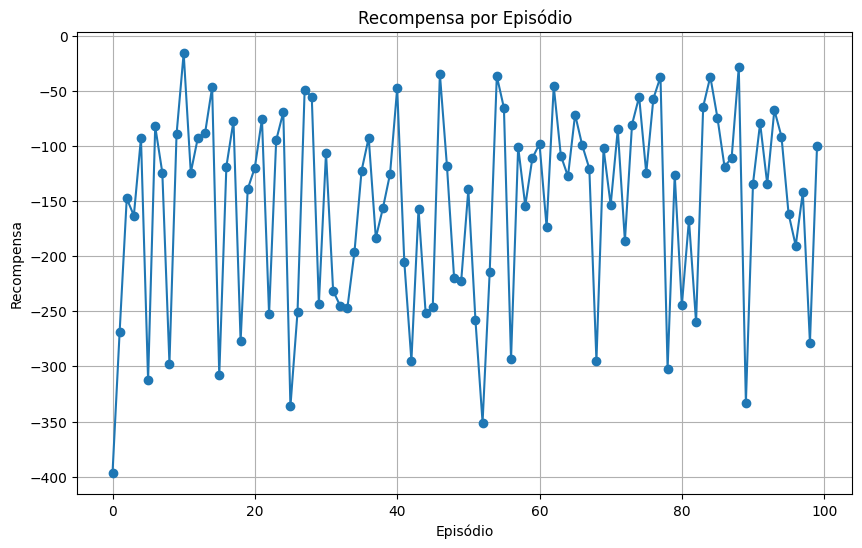

In [116]:
# Criar a array do eixo x (episódios)
episodios = np.arange(0, 100)

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(episodios, reward_array, marker='o', linestyle='-')
plt.title('Recompensa por Episódio')
plt.xlabel('Episódio')
plt.ylabel('Recompensa')
plt.grid(True)
plt.show()